<a href="https://colab.research.google.com/github/metetolga/DeepLearningBasics/blob/main/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255

print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3006 - accuracy: 0.9127 - val_loss: 0.1415 - val_accuracy: 0.9606
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1467 - accuracy: 0.9561 - val_loss: 0.1061 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1088 - accuracy: 0.9677 - val_loss: 0.0919 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0898 - accuracy: 0.9722 - val_loss: 0.0899 - val_accuracy: 0.9722
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0765 - accuracy: 0.9755 - val_loss: 0.0806 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0672 - accuracy: 0.9793 - val_loss: 0.0746 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0587 - accuracy: 0.9810 - val_loss: 0.0748 - val_accuracy

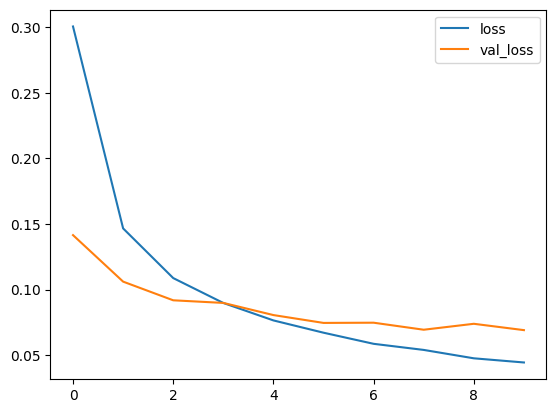

In [6]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

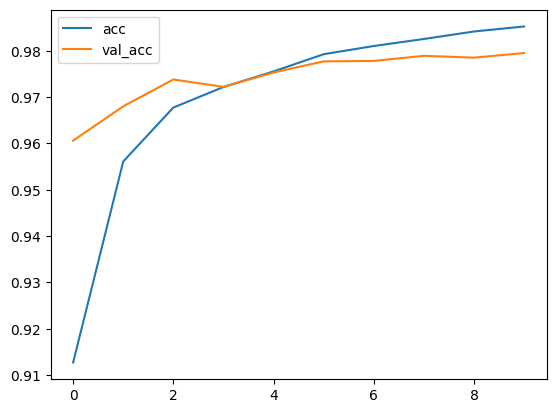

In [7]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.legend()
plt.show()

In [8]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9795
[0.06912755966186523, 0.9794999957084656]


313/313 [==============================] - 1s 2ms/step
confusion matrix without normalization


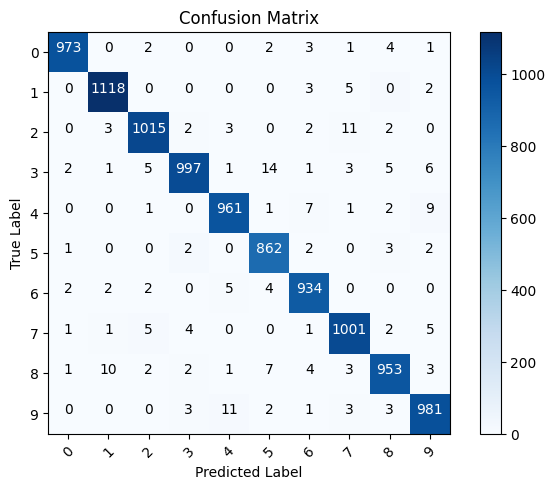

In [9]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("confusion matrix with normalization")
  else:
    print("confusion matrix without normalization")

  # If wanted to see, raw representation of confusion matrix
  # print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j, i,
        format(cm[j, i],fmt),
        horizontalalignment = 'center',
        color = 'white' if cm[j, i] > thresh else 'black'
    )
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_cm(cm, list(range(10)))

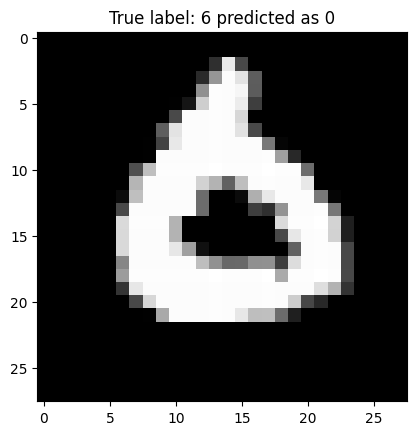

In [11]:
def plot_missclassified(pred, true):
  misscls_idx = np.where(pred != true)[0]
  i = np.random.choice(misscls_idx)
  plt.imshow(X_test[i], cmap='gray')
  plt.title('True label: %s predicted as %s' % (y_test[i], p_test[i]))
  plt.show()

plot_missclassified(p_test, y_test)